In [1]:
#Packages

import pandas as pd
import numpy as np
import scipy

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance
from matplotlib import pyplot
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cross_validation import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
classifiers = [('AdaBoostClassifier', AdaBoostClassifier()),
               ('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
               ('LogisticRegression', LogisticRegression())
              ]

In [3]:
# Importing data

data1 = pd.read_csv('student-mat.csv')
data2 = pd.read_csv('student-por.csv')

In [4]:
# Data Cleaning

data = [data1,data2]
data=pd.concat(data)
data=data.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
data['AvgGrade'] = data[['G1', 'G2', 'G3']].mean(axis=1)

In [5]:
data.head(n=10).T

0        1        2         3        4           5        6  \
school           GP       GP       GP        GP       GP          GP       GP   
sex               F        F        F         F        F           M        M   
age              18       17       15        15       16          16       16   
address           U        U        U         U        U           U        U   
famsize         GT3      GT3      LE3       GT3      GT3         LE3      LE3   
Pstatus           A        T        T         T        T           T        T   
Medu              4        1        1         4        3           4        2   
Fedu              4        1        1         2        3           3        2   
Mjob        at_home  at_home  at_home    health    other    services    other   
Fjob        teacher    other    other  services    other       other    other   
reason       course   course    other      home     home  reputation     home   
guardian     mother   father   mother    mother   father      mother   mother   
traveltime        2        1        1         1        1           1        1   
studytime         2        2        2         3        2           2        2   
failures          0        0        3         0        0           0        0   
schoolsup       yes       no      yes        no       no          no       no   
famsup           no      yes       no       yes      yes         yes       no   
paid             no       no      yes       yes      yes         yes       no   
activities       no       no       no       yes       no         yes       no   
nursery         yes       no      yes       yes      yes         yes      yes   
higher          yes      yes      yes       yes      yes         yes      yes   
internet         no      yes      yes       yes       no         yes      yes   
romantic         no       no       no       yes       no          no       no   
famrel            4        5        4         3        4           5        4   
freetime          3        3        3         2        3           4        4   
goout             4        3        2         2        2           2        4   
Dalc              1        1        2         1        1           1        1   
Walc              1        1        3         1        2           2        1   
health            3        3        3         5        5           5        3   
absences          6        4       10         2        4          10        0   
G1                5        5        7        15        6          15       12   
G2                6        5        8        14       10          15       12   
G3                6        6       10        15       10          15       11   
AvgGrade    5.66667  5.33333  8.33333   14.6667  8.66667          15  11.6667   

                  7         8        9  
school           GP        GP       GP  
sex               F         M        M  
age              17        15       15  
address           U         U        U  
famsize         GT3       LE3      GT3  
Pstatus           A         A        T  
Medu              4         3        3  
Fedu              4         2        4  
Mjob          other  services    other  
Fjob        teacher     other    other  
reason         home      home     home  
guardian     mother    mother   mother  
traveltime        2         1        1  
studytime         2         2        2  
failures          0         0        0  
schoolsup       yes        no       no  
famsup          yes       yes      yes  
paid             no       yes      yes  
activities       no        no      yes  
nursery         yes       yes      yes  
higher          yes       yes      yes  
internet         no       yes      yes  
romantic         no        no       no  
famrel            4         4        5  
freetime          1         2        5  
goout             4         2        1  
Dalc              1         1        1  
Walc              1         1     

In [6]:
data.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean    16.812689    2.492447    2.293051    1.564955    1.927492    0.332326   
std      1.269194    1.130958    1.094027    0.742799    0.827405    0.716024   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  662.000000  662.000000  662.000000  662.000000  662.000000  662.000000   
mean     3.938066    3.184290    3.172205    1.504532    2.282477    3.531722   
std      0.941930    1.060583    1.161907    0.926567    1.290121    1.434835   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3    AvgGrade  
count  662.000000  662.000000  662.000000  662.000000  662.000000  
mean     4.930514   10.728097   10.708459   10.725076   10.720544  
std      6.858060    3.082098    3.529588    4.106738    3.395727  
min      0.000000    3.000000    0.000000    0.000000    1.333333  
25%      0.000000    8.000000    9.000000    9.000000    8.666667  
50%      3.000000   10.000000   11.000000   11.000000   10.666667  
75%      8.000000   13.000000   13.000000   13.000000   13.000000  
max     75.000000   19.000000   19.000000   20.000000   19.333333

In [7]:
# Categorical Features

categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [8]:
# Numerical Features

numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2', 'G3', 'AvgGrade'], dtype=object)

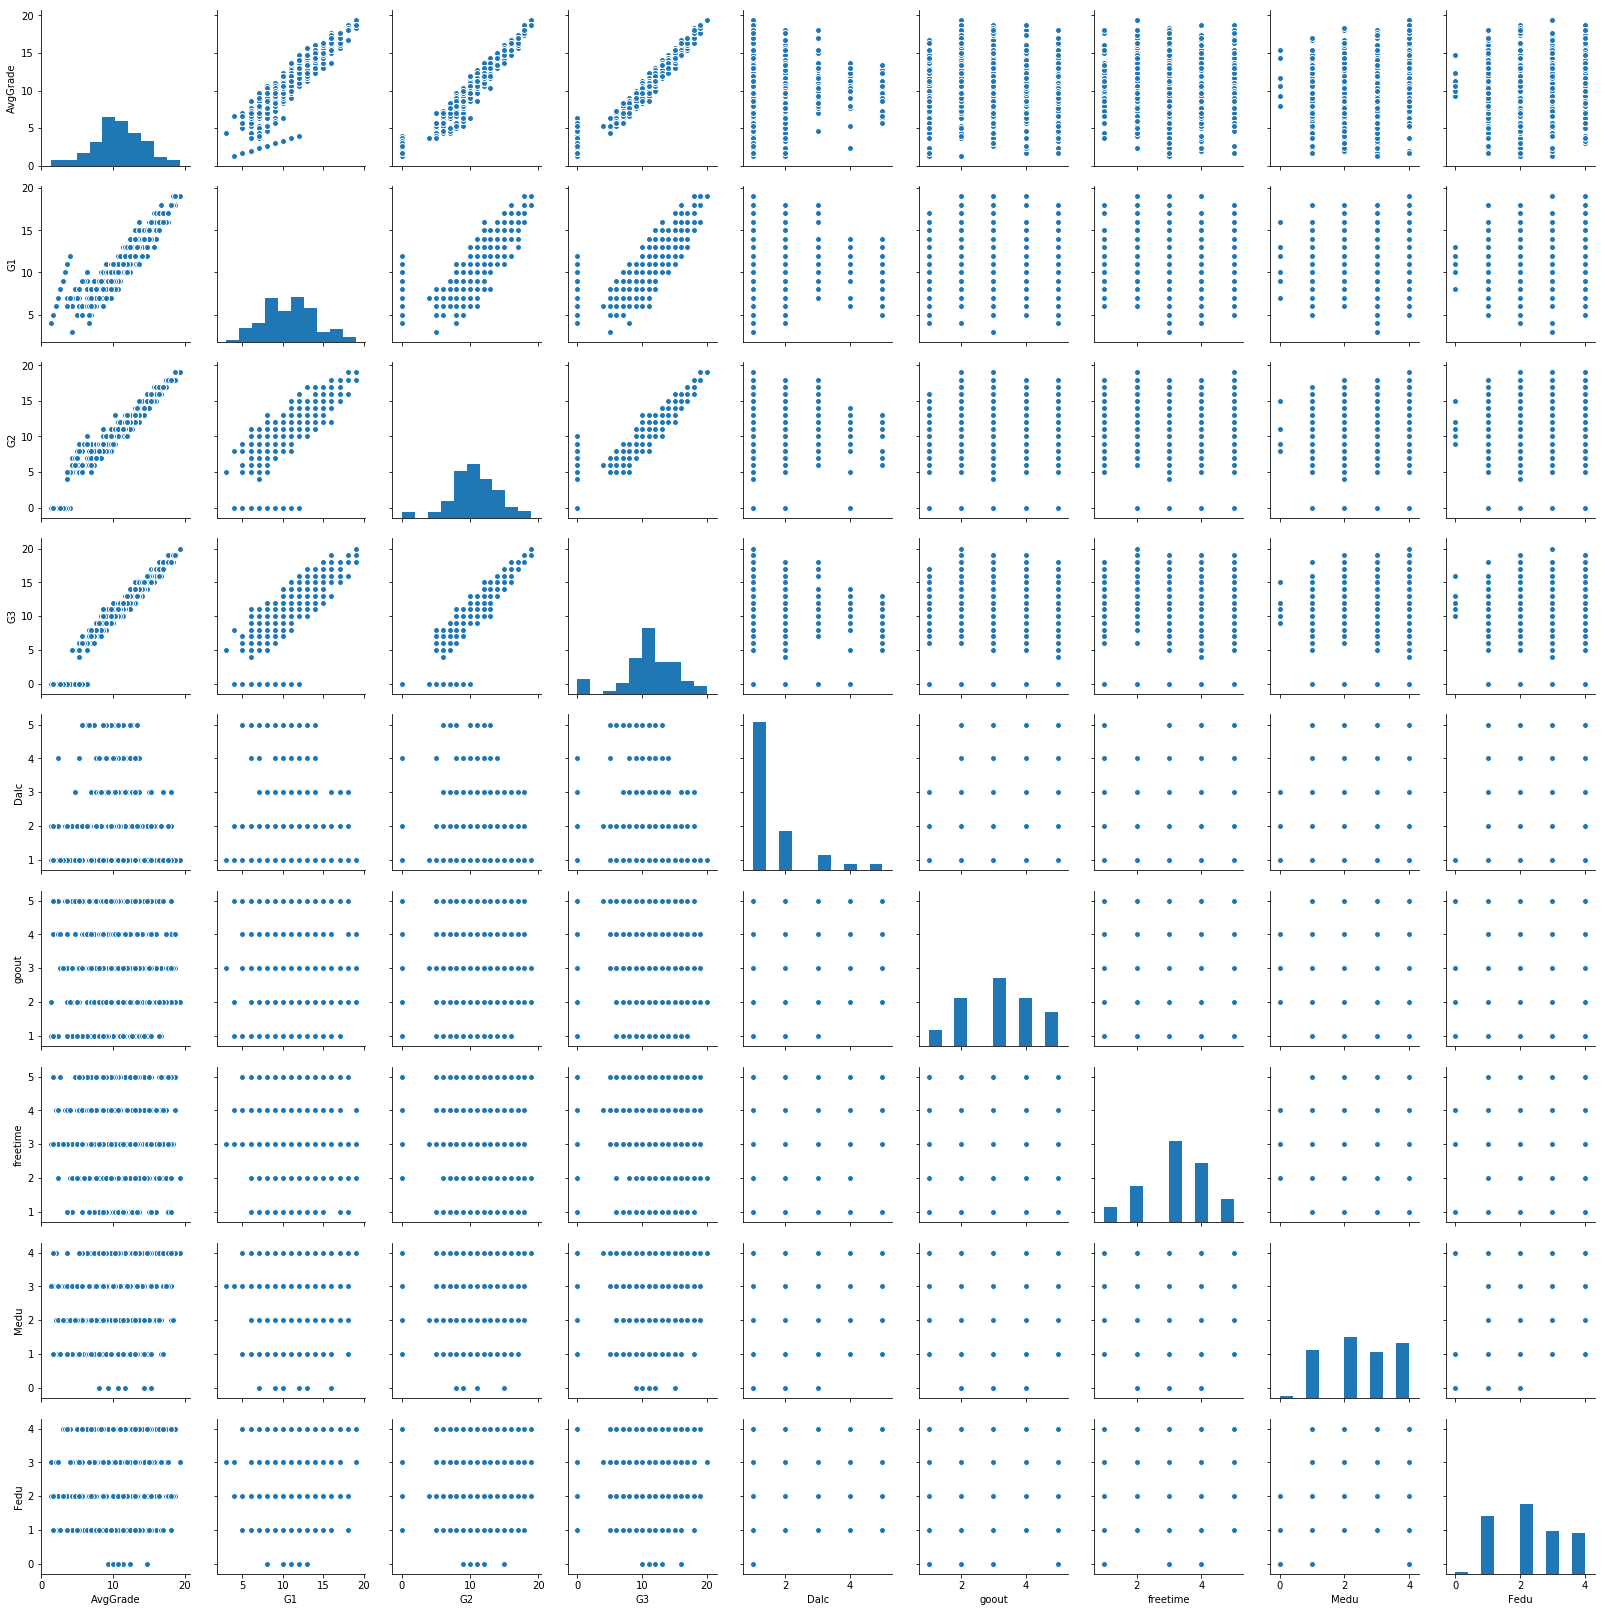

In [9]:
df_small = data[['AvgGrade', 'G1', 'G2', 'G3', 'Dalc', 'goout', 'freetime', 'Medu', 'Fedu']]
sns.pairplot(df_small)

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:64

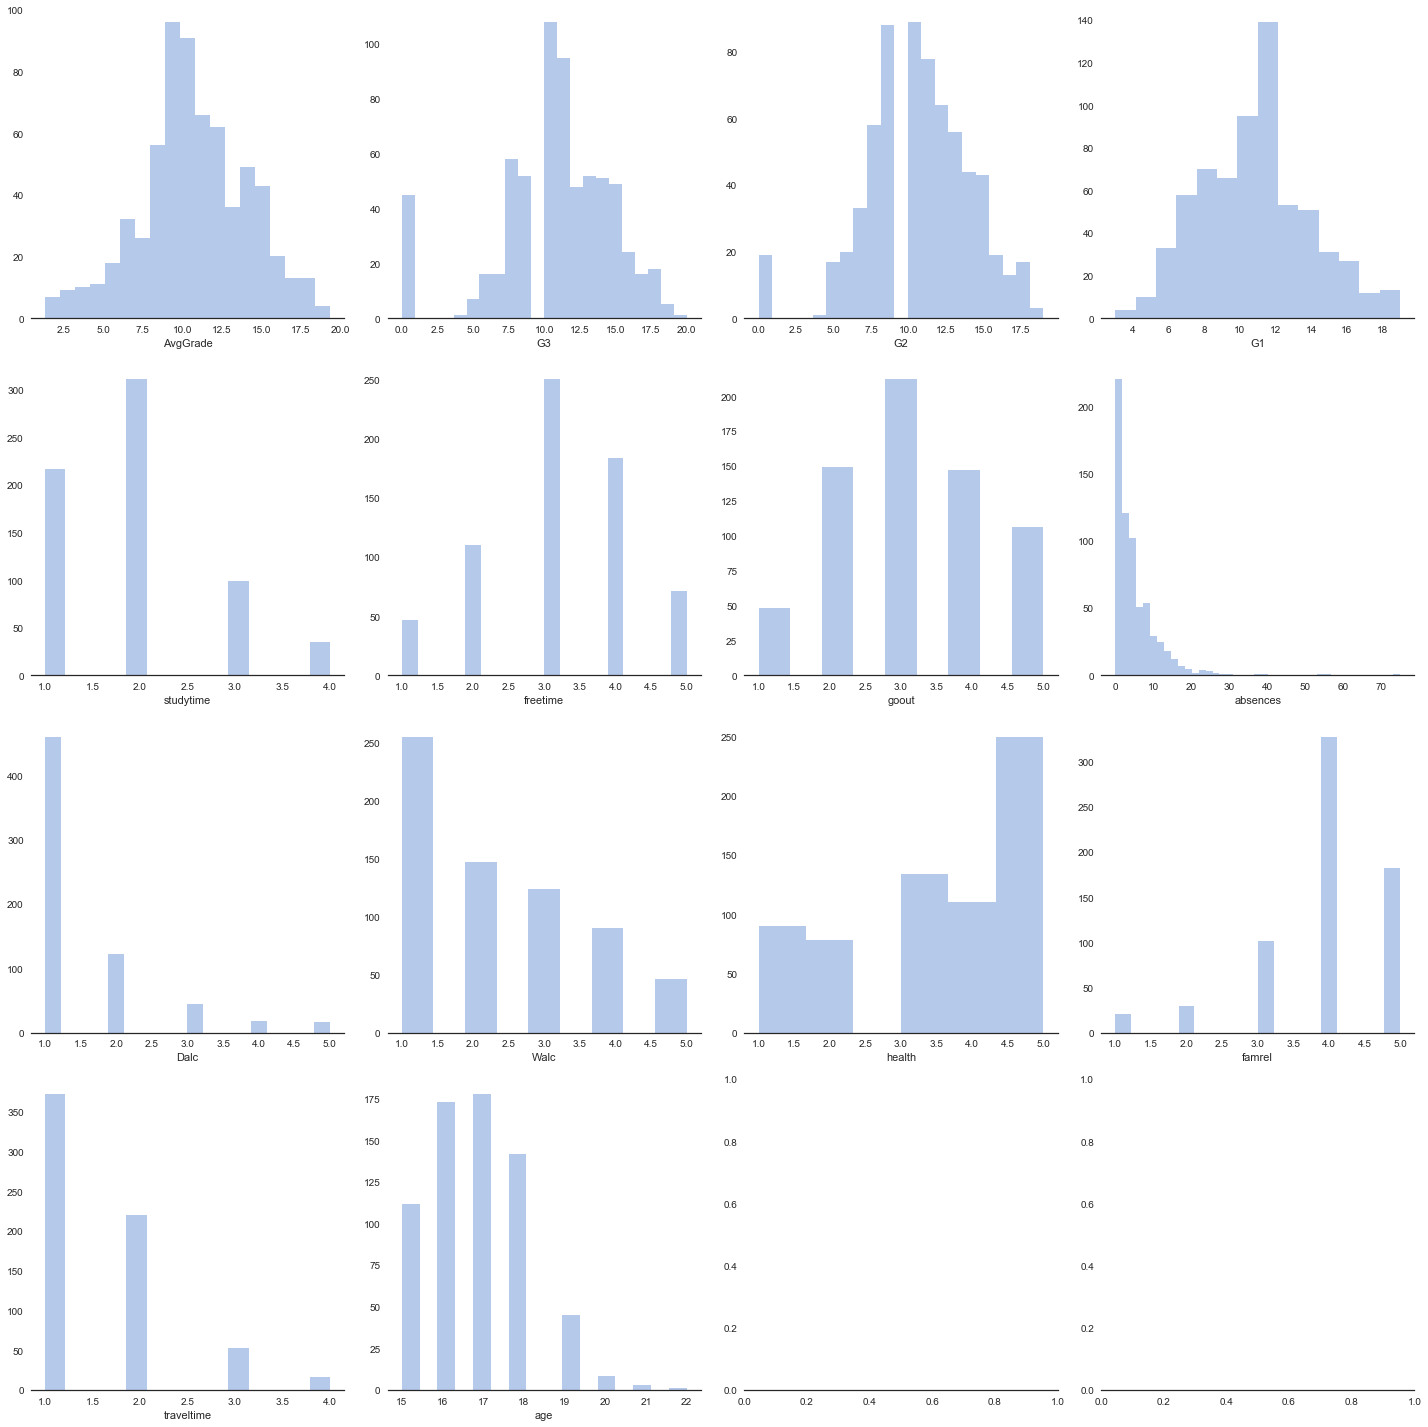

In [10]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(4, 4, figsize=(20,20))
sns.despine(left=True)
sns.distplot(data['AvgGrade'],  kde=False, color="b", ax=axes[0, 0])
sns.distplot(data['G1'],        kde=False, color="b", ax=axes[0, 3])
sns.distplot(data['G2'],        kde=False, color="b", ax=axes[0, 2])
sns.distplot(data['G3'],        kde=False, color="b", ax=axes[0, 1])
sns.distplot(data['studytime'], kde=False, color="b", ax=axes[1, 0])
sns.distplot(data['freetime'],  kde=False, color="b", ax=axes[1, 1])
sns.distplot(data['goout'],     kde=False, color="b", ax=axes[1, 2])
sns.distplot(data['absences'],  kde=False, color="b", ax=axes[1, 3])
sns.distplot(data['Dalc'],      kde=False, color="b", ax=axes[2, 0])
sns.distplot(data['Walc'],      kde=False, color="b", ax=axes[2, 1])
sns.distplot(data['health'],    kde=False, color="b", ax=axes[2, 2])
sns.distplot(data['famrel'],    kde=False, color="b", ax=axes[2, 3])
sns.distplot(data['traveltime'],kde=False, color="b", ax=axes[3, 0])
sns.distplot(data['age'],       kde=False, color="b", ax=axes[3, 1])
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

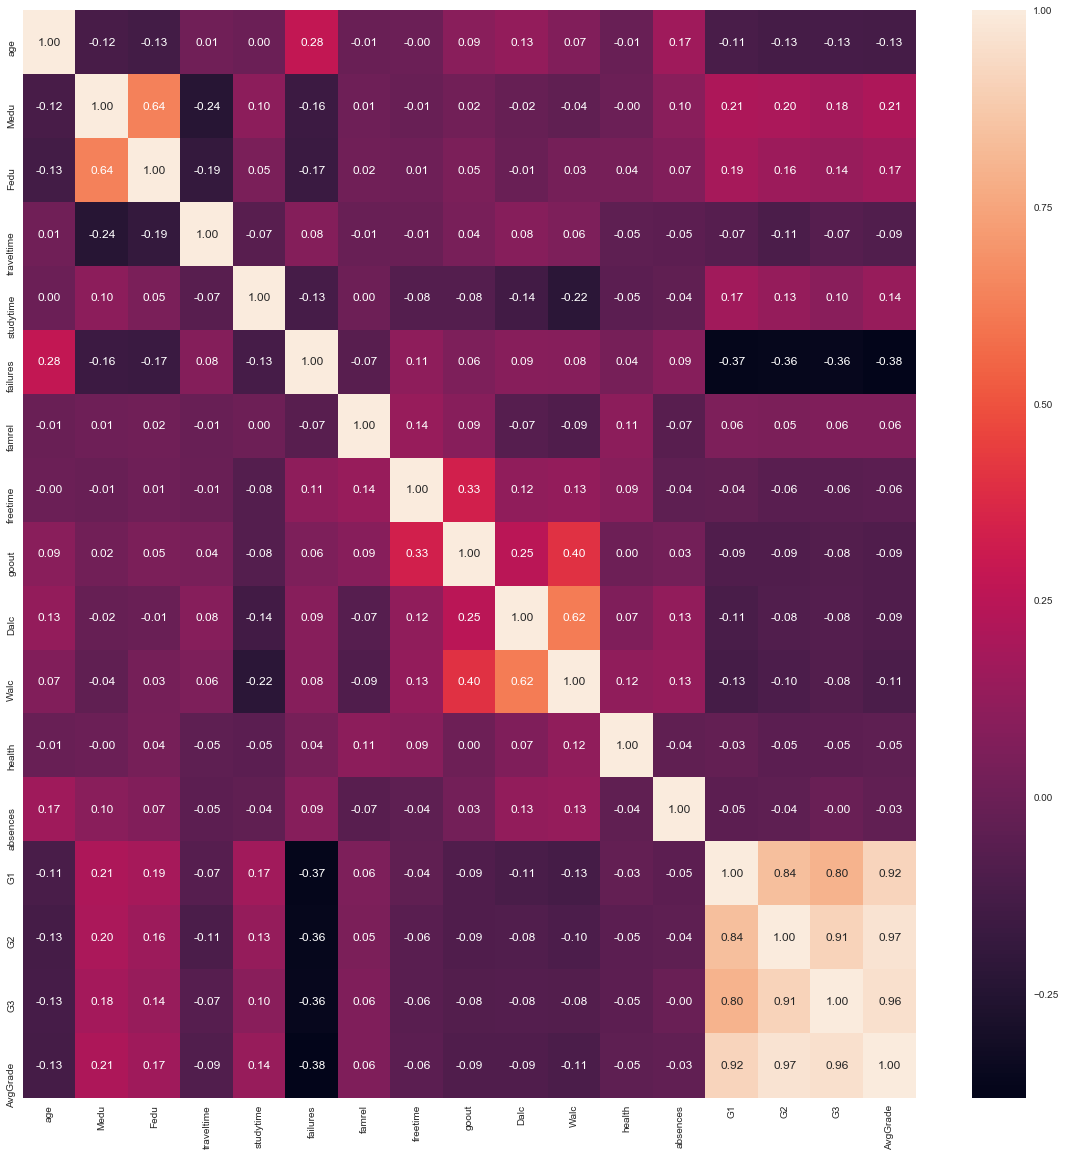

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)

In [12]:
mod_df = data 
binaryYesNo = {'yes': 1, 'no': 0}
school_map  = {'MS': 1, 'GP': 2}
sex_map     = {'M': 1, 'F': 2}
address_map = {'R':1, 'U':2}
famsize_map = {'LE3':1, 'GT3':2}
pstatus_map = {'A':1, 'T':2}
mjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

fjob_map    = {'services' : 1, 
            'health' : 2, 
            'other' : 3, 
            'at_home' : 4, 
            'teacher' : 5}

reason_map   = {'course':1, 'other':2, 'reputation':3, 'home':4}
guardian_map = {'other':0, 'father':1, 'mother':1}

mod_df.schoolsup  = mod_df.schoolsup.map(binaryYesNo)
mod_df.famsup     = mod_df.famsup.map(binaryYesNo)
mod_df.paid       = mod_df.paid.map(binaryYesNo)
mod_df.activities = mod_df.activities.map(binaryYesNo)
mod_df.nursery    = mod_df.nursery.map(binaryYesNo)
mod_df.higher     = mod_df.higher.map(binaryYesNo)
mod_df.internet   = mod_df.internet.map(binaryYesNo)
mod_df.romantic   = mod_df.romantic.map(binaryYesNo)

mod_df.school   = mod_df.school.map(school_map)
mod_df.sex      = mod_df.sex.map(sex_map)
mod_df.address  = mod_df.address.map(address_map)
mod_df.famsize  = mod_df.famsize.map(famsize_map)
mod_df.Pstatus  = mod_df.Pstatus.map(pstatus_map)
mod_df.Mjob     = mod_df.Mjob.map(mjob_map)
mod_df.Fjob     = mod_df.Fjob.map(fjob_map)
mod_df.reason   = mod_df.reason.map(reason_map)
mod_df.guardian = mod_df.guardian.map(guardian_map)


mod_df.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0       2    2   18        2        2        1     4     4     4     5   
1       2    2   17        2        2        2     1     1     4     3   
2       2    2   15        2        1        2     1     1     4     3   
3       2    2   15        2        2        2     4     2     2     1   
4       2    2   16        2        2        2     3     3     3     3   

     ...      freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  \
0    ...             3      4     1     1       3         6   5   6   6   
1    ...             3      3     1     1       3         4   5   5   6   
2    ...             3      2     2     3       3        10   7   8  10   
3    ...             2      2     1     1       5         2  15  14  15   
4    ...             3      2     1     2       5         4   6  10  10   

    AvgGrade  
0   5.666667  
1   5.333333  
2   8.333333  
3  14.666667  
4   8.666667  

[5 rows x 34 columns]

In [13]:
def train_on_classifiers():
    classifier_scores = {}

    x, Y = mod_df.drop('AvgGrade', axis=1), np.asarray(mod_df['AvgGrade'], dtype="|S6")

    for name, classifier in classifiers:
        scores = []
        for i in range(10):
            score = cross_val_score(classifier, x, Y)
            scores.extend(list(score))
        scores = np.array(scores)
        classifier_scores[name] = scores.mean()
        
    return classifier_scores

In [14]:
classifier_scores = train_on_classifiers()

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated cla

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


# AdaBoost Classifier

In [15]:
classifier_scores['AdaBoostClassifier']

0.1113398502729985

# KNeighbors Classifier

In [16]:
classifier_scores['KNeighborsClassifier']

0.15222589138850845

In [17]:
# Logistic Regression

In [18]:
classifier_scores['LogisticRegression']

0.0702088297652776

Text(0.5,0,'Weekly alcohol consumption')

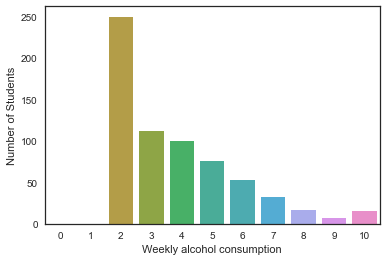

In [19]:
data['Dalc'] = data['Dalc'] + data['Walc']
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.

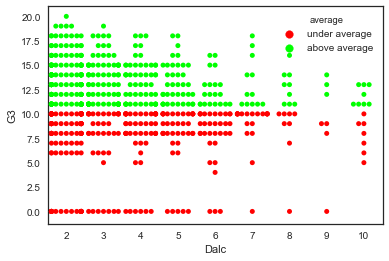

In [20]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

From the above plot it can be seen that student who takes highest grade consumes alcohol only 2 times in a week.

Text(0.5,0,'Weekly alcohol consumption')

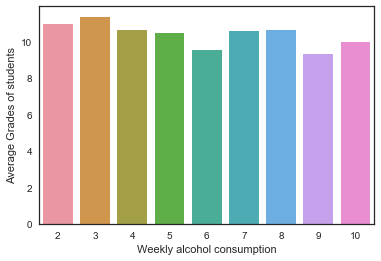

In [21]:
# Average grade
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/harshpatel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


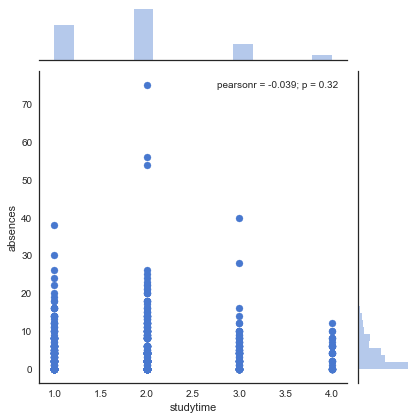

In [22]:
graph = sns.jointplot(x="studytime", y="absences", data=data)

## Splitting data

In [23]:
def train_test_data1():
    X,y = data1.iloc[:,:-3], data1.iloc[:,-2]

    le = LabelEncoder()
    for col in X.columns.values:
        if X[col].dtypes == 'object':
            le.fit(X[col].values)
            X[col] = le.transform(X[col])

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def train_test_data2():
    X,y = data2.iloc[:,:-3], data2.iloc[:,-2]

    le = LabelEncoder()
    for col in X.columns.values:
        if X[col].dtypes == 'object':
            le.fit(X[col].values)
            X[col] = le.transform(X[col])

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

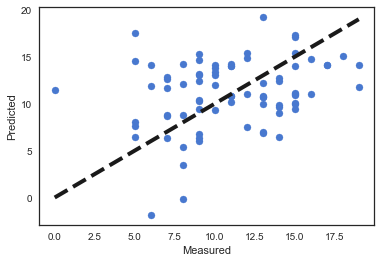

In [25]:
X_train, X_test, y_train, y_test = train_test_data1()
X,y = data1.iloc[:,:-3], data1.iloc[:,-2]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

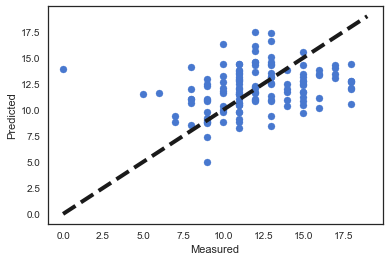

In [26]:
X_train, X_test, y_train, y_test = train_test_data2()
X,y = data2.iloc[:,:-3], data2.iloc[:,-2]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

predicted = cross_val_predict(regr, X_test, y_test, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# SVM

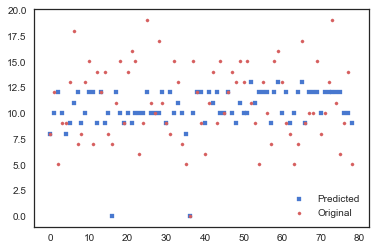

In [27]:
X_train, X_test, y_train, y_test = train_test_data1()
regr = svm.SVC()
regr.fit(X_train, y_train)

l = [i for i in range(0,79)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(l, regr.predict(X_test), s=10, c='b', marker="s", label='Predicted')
ax1.scatter(l,y_test, s=10, c='r', marker="o", label='Original')
plt.legend();
plt.show()

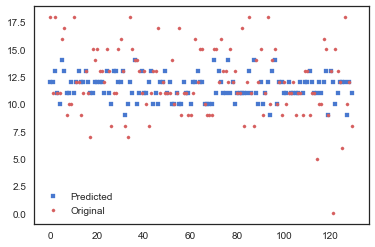

In [28]:
X_train, X_test, y_train, y_test = train_test_data2()
regr = svm.SVC()
regr.fit(X_train, y_train)

l = [i for i in range(0,130)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(l, regr.predict(X_test), s=10, c='b', marker="s", label='Predicted')
ax1.scatter(l,y_test, s=10, c='r', marker="o", label='Original')
plt.legend();
plt.show()

In [29]:
df1 = pd.read_csv("student-mat.csv")
df2 = pd.read_csv("student-por.csv")
result = df1.append(df2)
result = result.reset_index(drop=True)

le = LabelEncoder()

#Normalize absences value
fabs = result[["absences"]].values
fabs = np.where(fabs > 10, 1, 0)

#Represent Alcohol Consumption in One Week
target = ((result[["Walc"]].values * 2) + (result[["Dalc"]].values * 5)/7)
target = np.where(target >= 3, 1, 0)

res = pd.DataFrame(fabs)
res.columns = ['fabs']

res2 = pd.DataFrame(target)
res2.columns = ['target']

fix = result.join(res, how='outer')
fix2 = fix.join(res2, how='outer')

del fix2['Walc']
del fix2['Dalc']
del fix2['absences']

fix2 = fix2.reindex(np.random.permutation(fix2.index))
X = fix2[fix2.columns[0:31]]
Y = fix2['target'].astype('category')

for col in X.columns.values:
    if X[col].dtypes == 'object':
        le.fit(X[col].values)
        X[col] = le.transform(X[col])

clf = ExtraTreesClassifier()
clf = clf.fit(X, Y)
model = SelectFromModel(clf, prefit=True)
New_features = model.transform(X)
print(New_features.shape)
model.get_support()

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(1044, 14)


array([False,  True,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False,  True, False])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Decision Tree Classifier

In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

In [32]:
y_pred = clf.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

0.7655502392344498

# Random Forest Classifier

In [33]:
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit(X_train, y_train)
forest.score(X_train, y_train)
y_pred = forest.predict(X_test)
acc_test = metrics.accuracy_score(y_test,y_pred)
acc_test

0.8086124401913876

# XG Booster

In [34]:
model = XGBClassifier()
model = XGBClassifier(learning_rate=0.1,n_estimators=100)
kfold = StratifiedKFold(y_train, n_folds=3, shuffle=True, random_state=7)
for traincv,testcv in kfold:
    model.fit(X_train.iloc[traincv],y_train.iloc[traincv])

y_pred = model.predict(X_test)

/Users/harshpatel/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


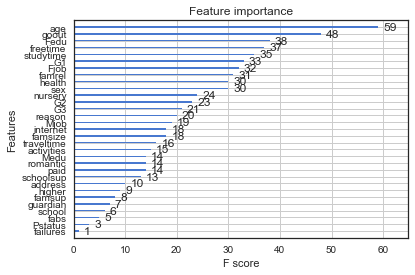

In [35]:
plot_importance(model)
pyplot.show()